In [17]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [18]:
inn = tf.keras.Input(shape=(128, 128,3))
Z1 = tfl.Conv2D(16, (3,3))(inn)
A1 = tfl.ReLU()(Z1)
P1 = tfl.MaxPool2D((2,2))(A1)
Z2 = tfl.Conv2D(32, (3,3))(P1)
A2 = tfl.ReLU()(Z2)
P2 = tfl.MaxPool2D((2,2))(A2)
Z3 = tfl.Conv2D(64, (3,3))(P2)
A3 = tfl.ReLU()(Z3)
P3 = tfl.MaxPool2D((2,2))(A3)
F = tfl.Flatten()(P3)
D1 = tfl.Dense(512, activation='relu')(F)
out = tfl.Dense(1, activation='sigmoid')(D1)

model = tf.keras.Model(inputs=inn, outputs=out)

In [19]:
model.load_weights("weights.h5")

In [20]:
def predict(img):
    imag1 = tf.keras.preprocessing.image.load_img(img, target_size=(256,256))
    imag = tf.keras.preprocessing.image.load_img(img, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(imag)
    x = np.array(image)/255
    Y_pred = np.array(model(x.reshape(1, 128, 128, 3)))
    if Y_pred[0] > 0.5:
        Y_pred[0] = 1
        Y = 'Dog'
    else:
        Y_pred[0] = 0
        Y = 'Cat'
    print(Y)
    plt.imshow(imag1) 
    plt.title(Y)
    plt.show()

Cat


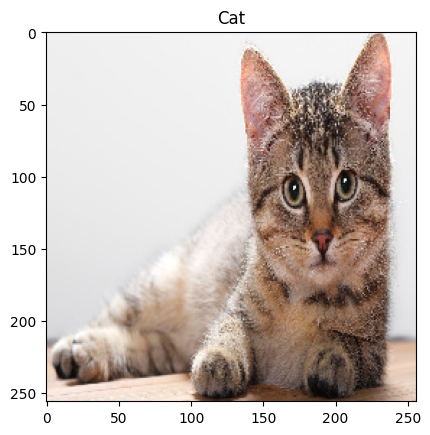

In [22]:
img = 'cat_or_dog_2.jpg'
predict(img)